# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def calculate_xy(t, x0=0, y0=0, L=40, step=1, V=10):
    t = float(t)
    t_row = L / V  # Время на строку
    t_step = step / V  # Время на переход
    t_total = t_row + t_step  # Общее время на строку и переход

    n = int(t // t_total)  # Текущая строка

    # Координата y
    y = y0 + n * step

    # Координата x
    t_in_cycle = t % t_total
    if n % 2 == 0:
        # Движение слева направо
        x = x0 + t_in_cycle * V
    else:
        # Движение справа налево
        x = x0 + L - t_in_cycle * V

    return x, y

In [14]:
def read_and_process_csv(file_path):
    """
    Reads a CSV file, calculates x and y for each row based on time, and saves separate CSV files for Bx, By, Bz.

    :param file_path: Path to the CSV file.
    """
    df = pd.read_csv(file_path, sep=';', decimal=',')
    df[['x', 'y']] = df.apply(lambda row: calculate_xy(row['time']), axis=1, result_type='expand')

    # Save separate CSV files for each component
    df[['x', 'y', 'Bx']].to_csv('Bx_coordinates.csv', index=False)
    df[['x', 'y', 'By']].to_csv('By_coordinates.csv', index=False)
    df[['x', 'y', 'Bz']].to_csv('Bz_coordinates.csv', index=False)

    return df

In [16]:
df = read_and_process_csv('mag.csv')

In [17]:
df

,time,Bx,By,Bz,BT,x,y
0,0.287351,671.5,2404.9,-102.4,2498.99,2.87351,0.0
1,1.273935,530.6,2417.7,-80.4,2476.54,12.73935,0.0
2,2.285588,539.4,2413.7,-88.7,2474.83,22.85588,0.0
3,3.322846,2092.6,1797.2,-1333.1,3063.67,33.22846,0.0
4,4.270870,-18.6,-1820.2,-1310.6,2243.02,38.29130,1.0
...,...,...,...,...,...,...,...
178,178.347452,159.8,-48.3,-90.0,189.65,19.52548,43.0
179,179.355689,104.3,49.8,19.3,117.18,9.44311,43.0
180,180.350637,56.5,83.3,53.2,113.85,-0.50637,43.0
181,181.353071,34.3,90.9,59.0,113.67,9.53071,44.0


# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [19]:
def plot_magnetic_field(df, component):
    """
    Plots the magnetic field component with color representing its magnitude.

    :param df: DataFrame containing x, y, and the magnetic field component.
    :param component: The magnetic field component to plot ('Bx', 'By', or 'Bz').
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['x'], df['y'], c=df[component], cmap='viridis', s=50)
    plt.colorbar(scatter, label=f'{component} Magnitude')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{component} Magnetic Field')
    plt.show()

# Example usage

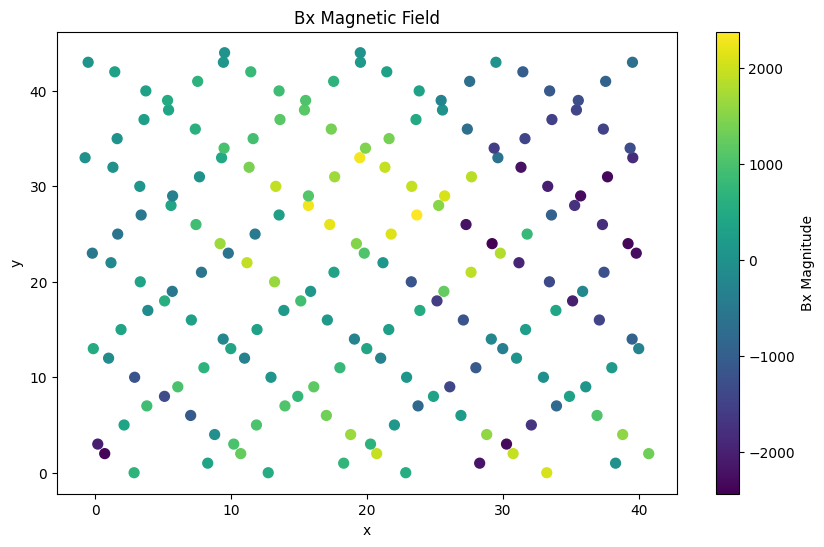

In [20]:
plot_magnetic_field(df, 'Bx')


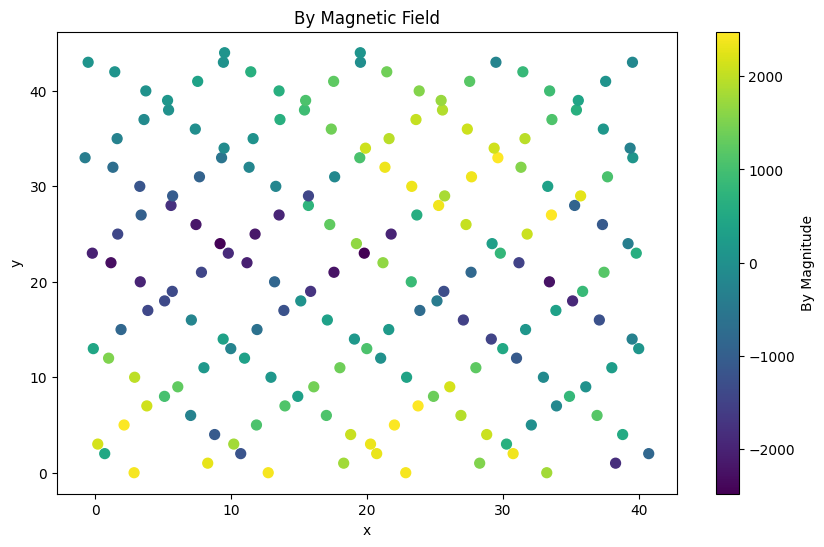

In [21]:
plot_magnetic_field(df, 'By')

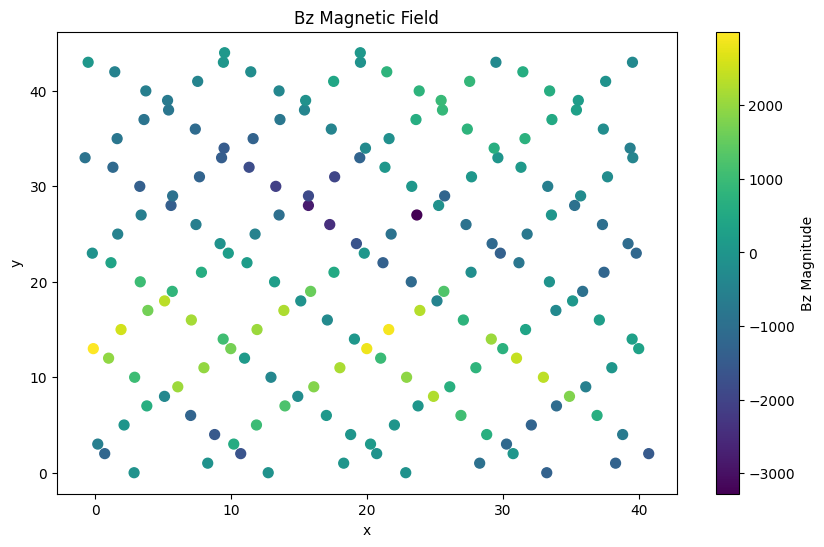

In [22]:
plot_magnetic_field(df, 'Bz')

In [23]:
df

,time,Bx,By,Bz,BT,x,y
0,0.287351,671.5,2404.9,-102.4,2498.99,2.87351,0.0
1,1.273935,530.6,2417.7,-80.4,2476.54,12.73935,0.0
2,2.285588,539.4,2413.7,-88.7,2474.83,22.85588,0.0
3,3.322846,2092.6,1797.2,-1333.1,3063.67,33.22846,0.0
4,4.270870,-18.6,-1820.2,-1310.6,2243.02,38.29130,1.0
...,...,...,...,...,...,...,...
178,178.347452,159.8,-48.3,-90.0,189.65,19.52548,43.0
179,179.355689,104.3,49.8,19.3,117.18,9.44311,43.0
180,180.350637,56.5,83.3,53.2,113.85,-0.50637,43.0
181,181.353071,34.3,90.9,59.0,113.67,9.53071,44.0
